# Setup

Hostname: krylov-ws-rc-gqxmv-oweiixph-cd5a81p1v--ucwqfdf8j5mpet1yu-hkwz8


In [1]:
base_path_kry = '/home/mmandelbrod/repositories/'
base_path_mac = '/Users/mmandelbrod/workspace/'
import sys
import os

tmp = !hostname
if tmp[0].startswith('krylov'):
    on_kry = True
else: 
    on_kry = False
    
base_path = base_path_kry if on_kry else base_path_mac

print(base_path)

# sys.path.append(os.path.join(base_path, 'signals/'))
# # sys.path.append(os.path.join(base_path, 'signals/src'))
# sys.path.append(os.path.join(base_path, 'generative-signals/'))
# sys.path.append(os.path.join(base_path, 'generative-signals/src'))
# sys.path.append(os.path.join(base_path, 'signals/workflows/pipelines/'))
# sys.path.append(os.path.join(base_path, 'signals/workflows/global_utils/'))
# sys.path.append(os.path.join(base_path, 'signals/workflows'))
# sys.path.append(os.path.join(base_path, 'matans_sandbox/utils'))

os.chdir(os.path.join(base_path,'generative_signals'))
print(f"curr dir: {os.getcwd()}")
        

/home/mmandelbrod/repositories/
curr dir: /home/mmandelbrod/repositories/generative_signals


In [2]:
from dev.generation.sigs_classifier.classifier_funcs import *

In [3]:
import pyspark.sql.functions as F
import pandas as pd
import time

In [4]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import base64
from bs4 import BeautifulSoup
import re
from pyspark.sql.functions import broadcast
from sklearn.model_selection import train_test_split

In [5]:
import json
import os
from datetime import datetime
from functools import reduce
from typing import List

import bxkrylov
# import bx_signals.etl.signals_fetcher as fetcher
from pyspark.sql.functions import array, col, expr, lower, when, row_number, lit, first, get_json_object, from_json, explode, split, count, collect_list, concat_ws, array_distinct, map_values, aggregate, size, regexp_replace, isnull, filter
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, MapType, IntegerType, LongType
from pyspark.sql.functions import array_intersect, array_contains, array_except, coalesce, map_keys
from pyspark.sql import DataFrame



In [95]:
import pandas as pd
import pyarrow, json
import pyarrow.parquet as pq
from sklearn.metrics import precision_score, recall_score, confusion_matrix 
import matplotlib.pyplot as plt 

In [7]:

    
# min_execs = 400
# max_execs = 1000



# bxkrylov.spark_notebook(globals(),
#                         spark_dynamicAllocation_minExecutors=min_execs,
#                         spark_executor_instances=min_execs,
#                         spark_dynamicAllocation_initialExecutors=min_execs,
#                         spark_dynamicAllocation_maxExecutors=max_execs,
#                         spark_executor_memory="10g",
#                         spark_driver_maxResultSize="26g",
#                         spark_executor_memoryOverhead="26g",
#                         spark_driver_memory="80g",
#                         spark_kryoserializer_buffer_max="1500m",
#                         spark_executor_cores="5", 
#                         spark_shuffle_io_maxRetries="10", 
#                         spark_shuffle_io_retryWait="5s",
#                         spark_reducer_maxSizeInFlight="96m",
#                         spark_network_timeout="800s",
#                         spark_executor_heartbeatInterval="60s", 
#                         spark_sql_session_timeZone="GMT-7"
#                         )

# directory = "./signals_sanity_reports"
# if not os.path.exists(directory):
#     os.makedirs(directory)
    
# !python3 -V
# spark.sparkContext.setLogLevel("OFF")
# spark


In [8]:
spark

NameError: name 'spark' is not defined

## importlib

In [77]:
## Importlib
##%%
import importlib
def refresh_module(module_name):
    try:
        module = importlib.import_module(module_name)
        importlib.reload(module)
        module = importlib.import_module(module_name)
        globals().update(module.__dict__)
    except ImportError as e:
        print(f"Error importing module {module_name}: {e}")
        return None
##%%
refresh_module('dev.generation.sigs_classifier.classifier_funcs')

In [13]:
import importlib


import dev.generation.sigs_classifier.classifier_funcs
importlib.reload(dev.generation.sigs_classifier.classifier_funcs)
import dev.generation.sigs_classifier.classifier_funcs
from dev.generation.sigs_classifier.classifier_funcs import *


# import data_extraction.extraction_funcs
# importlib.reload(data_extraction.extraction_funcs)
# import data_extraction.extraction_funcs
# from data_extraction.extraction_funcs import *

# import dataset_utils
# importlib.reload(dataset_utils)
# import dataset_utils
# from dataset_utils import *

# # import xgb_ranker_classifier_pipeline
# # importlib.reload(xgb_ranker_classifier_pipeline)
# # from xgb_ranker_classifier_pipeline import *

# import src.metrics.auuc_funcs
# importlib.reload(src.metrics.auuc_funcs)
# import src.metrics.auuc_funcs
# from src.metrics.auuc_funcs import *

# import pipelines.xgb_predict_signal_pipeline
# importlib.reload(pipelines.xgb_predict_signal_pipeline)
# import pipelines.xgb_predict_signal_pipeline
# from pipelines.xgb_predict_signal_pipeline import *



# import src.metrics.xgb_metrics_funcs
# importlib.reload(src.metrics.xgb_metrics_funcs)
# import src.metrics.xgb_metrics_funcs
# from src.metrics.auuc_funcs import *


# # import signals_pipeline_base
# # importlib.reload(signals_pipeline_base)
# #
# import pipelines.causalml_decision_tree_pipeline
# importlib.reload(pipelines.causalml_decision_tree_pipeline)
# import pipelines.causalml_decision_tree_pipeline
# from pipelines.causalml_decision_tree_pipeline import *

# # import config
# # importlib.reload(config)
# # from config import *

# import causal.causalml_funcs
# importlib.reload(causal.causalml_funcs)
# import causal.causalml_funcs
# from causal.causalml_funcs import *

# import pipeline_objects
# importlib.reload(pipeline_objects)
# from pipeline_objects import *
# #%%


In [53]:
# from  data_extraction.extraction_funcs import extract_item_data

In [21]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import base64
from bs4 import BeautifulSoup
import re
import pandas as pd

def html_to_plain(html: str):
    if html is None or len(html) == 0:
        return ""
    html = base64.b64decode(html).decode('utf-8')
    try:
        bs = BeautifulSoup(html, 'html.parser')
        plain = bs.get_text(separator=' ', strip=True)
        return re.sub(r"\s+", " ", plain)
    except:
        return ""



In [ ]:
## file path 

In [26]:
# df = pd.read_parquet("home_app_item_desc")

# df["desc"] = df["item_desc"].apply(lambda x: html_to_plain(x))

# item_id_to_desc = dict()
# for _, row in df.iterrows():
#     item_id_to_desc[str(row["item_id"])] = row["desc"]

# H&G 

## assistant_only_label

### Params 

In [52]:
hag_annotation_path = "/data/shpx/data/mmandelbrod/GenSigs/Datasets/AnnotationDatasets//df_final_all_hg_feb25.parquet"
output_train_hdfs_parquet_base_path = '/user/b_perso/mmandelbrod/gen_sigs'
output_train_hdfs_filename = 'hag_train_chat_for_athena_only_label'

aip_project = "signal_project"

# Enter the adapater name you used for training
adapter_name = "hag_only_label_no_reason"

# Enter the adapter version you used for training
adapter_version = "1"

# Base model used for training. Please see the adapter detail page for the exact name of the model
# base_model = "lilium-2-7b-chat"
base_model = "ebay-internal-chat-completions-athena-lilium2-7b-chat"

# Let's construct the adapter full name/path. It's structure is <aip_project>/<adapter_name>/<adapter_version>
adapter = f"{aip_project}/{adapter_name}/{adapter_version}"

In [54]:
adapter

'signal_project/hag_only_label_no_reason/1'

### Create datasets 

In [12]:
annotated_df = pd.read_parquet(hag_annotation_path)
df_messages_train, df_messages_test = create_train_test_datasets(annotated_df, train_size=0.7, how='assistant_only_label',
                           hdfs_out_dirname=output_train_hdfs_filename
                           )


### Predict 

In [51]:
df_messages_test = classify_gensigs(df_messages_test, base_model, adapter) 


You are an expert judge. You'll now be presented with an eBay's product data, consisting of the product title, aspectsand description, followed by an automatically generated characteristics of this product, which is a candidate to beshown to eBay shoppers as an incentivising signal when viewing the listing. Based on the product's details and the provided signal, assign a label indicating whether the signal is good. Provide a reason for your decision. Here are thepossible labels and reasons to assign them:
Label 0: Bad Signal. Signal is irrelevant, unclear, doesn't provide new information over the product's title,
or dominated by extraneous elements (e.g., excessive numbers or technical jargon).
Possible Reasons for Label 0:
Use the following reasons to justify why the signal is bad.
-Repetitive Tokens: Contains redundant words or phrases.
-Not Clear: Vague or lacks meaningful information.
-Doesn't add information to the title: signal appears partially in title
-Refers to the product's

ValueError: Failed to get response from the chomsky server. Status code: 500. Response: {"error":{"code":"500","message":"Failed to call app: athena-mvp-lilium-2-7b-chat-1-pvpt:io.grpc.StatusRuntimeException: UNKNOWN: Unexpected <class 'darwin.model.rpc.PredictionError'>: \"model failed with exception: ('Failed to load lora signal_project/hag_only_label_ortal_prompt_no_reason/1',) on athena-mvp-lilium-2-7b-cha-39682748dbb432f3815de4d79017e6cdfsgn\"","errorId":50004}}

In [31]:
df_messages_test = classify_gensigs(df_messages_test, base_model, adapter)                     

You are an expert judge. You'll now be presented with an eBay's listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing,                         which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it's safe, informative                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to                         indicate it's not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:                        
 Item title: 5pcs t8 magnetic torx screwdriver bits 1/4 inch hex shank S2 security, 
 Item aspects: {'brand': 'uxcell', 'color': 'silver', 'core_p

In [33]:
df_messages_test['pred_score'].value_counts()

pred_score
2    26
1    18
0     1
Name: count, dtype: int64

In [35]:
df_messages_test['final_label'].value_counts()

final_label
2.0    16
1.0    15
0.0    14
Name: count, dtype: int64

In [23]:
# from pychomsky.chchat import EbayLLMChatWrapper
# from langchain.schema.messages import HumanMessage
# chat = EbayLLMChatWrapper(
#     model_name = base_model,
#     model_adapter = adapter,
#     max_tokens = 4600,
#     temperature = 0.2,
#     top_p = 0.98,
#     presence_penalty = 0.0,
#     frequency_penalty = 0.0
# )

In [39]:
# responses = []
# for i, row in df_messages_test.iterrows():
#     curr_prompt = row['judge_prompt']
#     print(curr_prompt)
#     curr_response = chat([HumanMessage(content=curr_prompt)])
#     print()
#     print("curr_response")
#     print(curr_response)
#     # curr_response = chat.invoke(curr_prompt).content
#     curr_score = str(curr_response).split('Label: ')[1].split(" ' ")[0]
#     print(f"curr_score: {curr_score}")
#     responses.append(int(float(curr_score)))
# df_test['pred_score'] = responses
    

In [38]:
# res = "content=' Label: 1 ' response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 5, 'prompt_tokens': 1997, 'total_tokens': 2002}} id='run-a2c78ac0-e2f2-4271-bfed-186f0767fd49-0'"
# str(res).split('Label: ')[1].split(" ' ")[0]

## assistant_only_label_ortal_prompt

### Params 

In [55]:
hag_annotation_path = "/data/shpx/data/mmandelbrod/GenSigs/Datasets/AnnotationDatasets//df_final_all_hg_feb25.parquet"
output_train_hdfs_parquet_base_path = '/user/b_perso/mmandelbrod/gen_sigs'
output_train_hdfs_filename = 'hag_train_chat_for_athena_only_label_ortal_prompt'

aip_project = "signal_project"

# Enter the adapater name you used for training
adapter_name = "hag_train_chat_for_athena_only_label_ortal_prompt_2"

# Enter the adapter version you used for training
adapter_version = "1"

# Base model used for training. Please see the adapter detail page for the exact name of the model
base_model = "ebay-internal-chat-completions-athena-lilium2-7b-chat"

# Let's construct the adapter full name/path. It's structure is <aip_project>/<adapter_name>/<adapter_version>
adapter = f"{aip_project}/{adapter_name}/{adapter_version}" #'hag_train_chat_for_athena_only_label_ortal_prompt_2' #

In [50]:
adapter

'signal_project/hag_only_label_ortal_prompt_no_reason/1'

### Create datasets 

In [44]:
annotated_df = pd.read_parquet(hag_annotation_path)
df_messages_train, df_messages_test = create_train_test_datasets(annotated_df, train_size=0.7, how='assistant_only_label_ortal_prompt',
                           hdfs_out_dirname=output_train_hdfs_filename
                           )


### Register dataset and finetune on Athena 

### Predict 

In [56]:
df_messages_test = classify_gensigs(df_messages_test, base_model, adapter)                     


You are an expert judge. You'll now be presented with an eBay's product data, consisting of the product title, aspectsand description, followed by an automatically generated characteristics of this product, which is a candidate to beshown to eBay shoppers as an incentivising signal when viewing the listing. Based on the product's details and the provided signal, assign a label indicating whether the signal is good. Provide a reason for your decision. Here are thepossible labels and reasons to assign them:
Label 0: Bad Signal. Signal is irrelevant, unclear, doesn't provide new information over the product's title,
or dominated by extraneous elements (e.g., excessive numbers or technical jargon).
Possible Reasons for Label 0:
Use the following reasons to justify why the signal is bad.
-Repetitive Tokens: Contains redundant words or phrases.
-Not Clear: Vague or lacks meaningful information.
-Doesn't add information to the title: signal appears partially in title
-Refers to the product's

In [57]:
df_messages_test['pred_score'].value_counts()

pred_score
2    24
1    20
0     1
Name: count, dtype: int64

In [58]:
df_messages_test['final_label'].value_counts()

final_label
0.0    17
1.0    15
2.0    13
Name: count, dtype: int64

## assistant_label_and_single_reason_ortal_prompt

### Params 

In [63]:
hag_annotation_path = "/data/shpx/data/mmandelbrod/GenSigs/Datasets/AnnotationDatasets//df_final_all_hg_feb25_manual_reason.parquet"
output_train_hdfs_parquet_base_path = '/user/b_perso/mmandelbrod/gen_sigs'
output_train_hdfs_filename = 'hag_train_chat_for_athena_label_and_reason_ortal_prompt'

aip_project = "signal_project"

# Enter the adapater name you used for training
adapter_name = "hag_train_chat_for_athena_label_and_reason_ortal_prompt"

# Enter the adapter version you used for training
adapter_version = "1"

# Base model used for training. Please see the adapter detail page for the exact name of the model
base_model = "ebay-internal-chat-completions-athena-lilium2-7b-chat"

# Let's construct the adapter full name/path. It's structure is <aip_project>/<adapter_name>/<adapter_version>
adapter = f"{aip_project}/{adapter_name}/{adapter_version}" #'hag_train_chat_for_athena_only_label_ortal_prompt_2' #

### Create datasets 

In [68]:
annotated_df = pd.read_parquet(hag_annotation_path)
df_messages_train, df_messages_test = create_train_test_datasets(annotated_df, train_size=0.7, how='assistant_label_and_single_reason_ortal_prompt',
                           hdfs_out_dirname=output_train_hdfs_filename
                           )


In [72]:
df_messages_test['judge_prompt'].iloc[0]

"\nYou are an expert judge. You'll now be presented with an eBay's product data, consisting of the product title, aspectsand description, followed by an automatically generated characteristics of this product, which is a candidate to beshown to eBay shoppers as an incentivising signal when viewing the listing. Based on the product's details and the provided signal, assign a label indicating whether the signal is good. Provide a reason for your decision. Here are thepossible labels and reasons to assign them:\nLabel 0: Bad Signal. Signal is irrelevant, unclear, doesn't provide new information over the product's title,\nor dominated by extraneous elements (e.g., excessive numbers or technical jargon).\nPossible Reasons for Label 0:\nUse the following reasons to justify why the signal is bad.\n-Repetitive Tokens: Contains redundant words or phrases.\n-Not Clear: Vague or lacks meaningful information.\n-Doesn't add information to the title: signal appears partially in title\n-Refers to the

### Register dataset and finetune on Athena 

### Predict 

In [75]:
chat = init_chat(base_model, adapter)
message = df_messages_test['judge_prompt'].iloc[0]
curr_response = chat([HumanMessage(content=message)])
curr_response

AIMessage(content=' Label: 2, Reason for label: Valuable feature ', response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 13, 'prompt_tokens': 1444, 'total_tokens': 1457}}, id='run-698dac1b-5457-4588-b338-f8ced4a35c4c-0')

In [76]:
str(curr_response)

"content=' Label: 2, Reason for label: Valuable feature ' response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 13, 'prompt_tokens': 1444, 'total_tokens': 1457}} id='run-698dac1b-5457-4588-b338-f8ced4a35c4c-0'"

In [78]:
df_messages_test = classify_gensigs(df_messages_test, base_model, adapter)                     


You are an expert judge. You'll now be presented with an eBay's product data, consisting of the product title, aspectsand description, followed by an automatically generated characteristics of this product, which is a candidate to beshown to eBay shoppers as an incentivising signal when viewing the listing. Based on the product's details and the provided signal, assign a label indicating whether the signal is good. Provide a reason for your decision. Here are thepossible labels and reasons to assign them:
Label 0: Bad Signal. Signal is irrelevant, unclear, doesn't provide new information over the product's title,
or dominated by extraneous elements (e.g., excessive numbers or technical jargon).
Possible Reasons for Label 0:
Use the following reasons to justify why the signal is bad.
-Repetitive Tokens: Contains redundant words or phrases.
-Not Clear: Vague or lacks meaningful information.
-Doesn't add information to the title: signal appears partially in title
-Refers to the product's

### Metrics 

In [79]:
df_messages_test['pred_score'].value_counts()

pred_score
2    26
0    11
1     8
Name: count, dtype: int64

In [80]:
df_messages_test['final_label'].value_counts()

final_label
2.0    17
1.0    14
0.0    14
Name: count, dtype: int64

In [96]:
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report

# One-hot encode the true and predicted labels
true_labels_binary = df_messages_test['final_label'] != 0
pred_labels_binary = df_messages_test['pred_score'] != 0

# auc_score = roc_auc_score(true_labels_binary, pred_labels_binary)
# auc_score


Text(0.5, 1.0, 'Confusion Matrix')

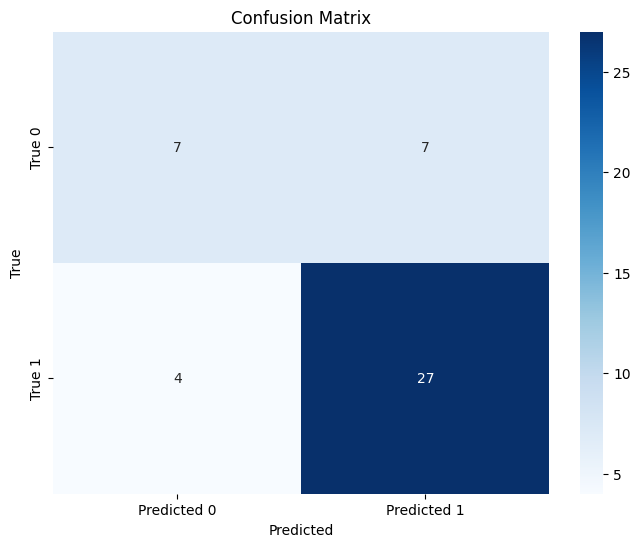

In [98]:
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(true_labels_binary, pred_labels_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [89]:

precision = precision_score(true_labels_binary, pred_labels_binary)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(true_labels_binary, pred_labels_binary)
print(f"Recall: {recall}")

Precision: 0.7941176470588235
Recall: 0.8709677419354839


In [84]:
df_messages_test[['final_label', 'pred_score']]

,final_label,pred_score
50,2.0,1
36,1.0,1
135,1.0,2
15,2.0,2
44,1.0,0
92,2.0,2
3,2.0,0
130,0.0,1
71,0.0,0
42,1.0,2


#  OLD: Create an Athena dataset from the annotation file 

## H&G - read annotation files 

In [23]:
hag_path = "/data/shpx/data/mmandelbrod/GenSigs/Datasets/AnnotationDatasets//df_final_all_hg_feb25.parquet"


/bin/bash: hls: command not found


In [24]:
hag_df = pd.read_parquet(hag_path)
len(hag_df)

150

In [25]:
hag_df = hag_df[~hag_df['final_label'].isna()]
len(hag_df)

149

In [26]:
df_train, df_test = train_test_split(hag_df, train_size=0.7)

In [27]:
len(df_train), len(df_test)

(104, 45)

In [29]:
# def csv_annotation_to_chat_format(in_csv_filename, out_chat_dirname=None):
#     indf = pd.read_csv(in_csv_filename)
#     cols_to_use = ['gen_sig_gpt', 'title', 'aspects', 'desc',  'label',	'reason','comment' ]
#     df = indf[cols_to_use]
#     # dataset_row_template = f'''
#     # [[ Item title {}, Item aspects: {}, Item description: {}. Generated signal: {}, user], [Label: {}, Reason for label: {}, Comment on label: {}]]"
#     # '''

#     def convert_row_to_format(row):
#         # return [
#         #     '''"content": f"Item title: {row['title']}, Item aspects: {row['aspects']}, Item description: {row['desc']}. Generated signal: {row['gen_sig_gpt']}",
#         #         "role": "user"''',
#         #     {"content": f"Label: {row['label']}, Reason for label: {row['reason']}, Comment on label: {row['comment']}",
#         #      "role": "assistant"}
#         # ]

#         return [
#             {
#                 "content": f"Item title: {row['title'].strip()}, Item aspects: {row['aspects'].strip()}, Item description: {row['desc'].strip()}. Generated signal: {row['gen_sig_gpt'].strip()}",
#                 "role": "user"},
#             {"content": f"Label: {row['label']}, Reason for label: {row['reason']}, Comment on label: {row['comment']}",
#              "role": "assistant"}
#         ]

#         # Apply the function to each row in the DataFrame

#     formatted_rows = df.apply(convert_row_to_format, axis=1).tolist()

#     # Define the schema
#     schema = ArrayType(StructType([
#         StructField("content", StringType(), True),
#         StructField("role", StringType(), True)
#     ]))

#     # Convert list of lists to Spark DataFrame
#     spark_df = spark.createDataFrame(formatted_rows, schema).toDF("messages")

#     # Show the DataFrame
#     spark_df.show(truncate=False)
#     return spark_df

## Create the train set 

In [28]:
# base_path_kry = '/home/mmandelbrod/repositories/'
# in_csv_path = os.path.join(base_path_kry, 'generative_signals/data/highlighted_text_filtered_by_heuristic_sample-HG_Matan.csv')
# indf = pd.read_csv(in_csv_path, dtype=str)
indf = df_train

label_colname = 'final_label'
reason_colname = 'final_reason'
comment_colname = 'final_comment'
cols_to_use = ['gen_sig_gpt', 'title', 'aspects', 'desc'] + [label_colname, reason_colname, comment_colname]

include_reason_and_comment = False

# Filter out rows with NaN values
# df_cleaned = indf.dropna()[cols_to_use]
df_cleaned = indf[cols_to_use]

json_list = []

#   "content": f"Item title: {row['title'].strip()}, Item aspects: {row['aspects'].strip().replace('{', '<<<').replace('}', '>>>')},\
for index, row in df_cleaned.iterrows():
    # print(f"{index}")
    assistant_content = f"Label: {row[label_colname]}, Reason for label: {row[reason_colname]}, Comment on label: {row[comment_colname]}" if include_reason_and_comment else f"Label: {int(float(row[label_colname]))}"
   
    row_list = [
        {
            "role": "user",
            "content": f"You are an expert judge. You'll now be presented with an eBay's listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing, \
                        which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it's safe, informative\
                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to \
                        indicate it's not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:\
                        \n Item title: {row['title'].strip()}, Item aspects: {row['aspects'].strip()}, Item description: {row['desc'].strip()}. Generated signal: {row['gen_sig_gpt'].strip()}"
        },
        {
            "role": "assistant",
            "content": assistant_content
        }
    ]
    json_list.append(row_list)



# for index, row in df_cleaned.iterrows():
#     row_list = [
#         {
#             "role": "user",
#             "content": f"Item title: {row['title'].strip()}"
#         },
#         {
#             "role": "assistant",
#             "content": f"Label: {row['label']}, Reason for label: {row['reason']}, Comment on label: {row['comment']}"
#         }
#     ]
#     json_list.append(row_list)

# schema = ArrayType(StructType([
#     StructField("role", StringType(), True),
#     StructField("content", StringType(), True)
# ]))

# spark_df = spark.createDataFrame(json_list, schema).toDF("messages")
# spark_df.write.mode("overwrite").parquet('hdfs://apollo-rno/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet')

    
    
# json_data = {
#     "messages": json_list
# }

# Define the schema
# schema = ArrayType(StructType([
#     StructField("role", StringType(), True),
#     StructField("content", StringType(), True)
# ]))

# # Create the DataFrame
# spark_df = spark.createDataFrame(json_data["messages"], schema).toDF("messages")
# spark_df.write.mode("overwrite").parquet('hdfs://apollo-rno/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet')
# Write JSON data to file
# with open('/home/mmandelbrod/repositories/generative_signals/data/hag_small.json', 'w') as f:
#     json.dump(json_data, f, indent=4)

In [31]:
json_list[0]

[{'role': 'user',
  'content': "You are an expert judge. You'll now be presented with an eBay's listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing,                         which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it's safe, informative                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to                         indicate it's not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:                        \n Item title: for sharp fpk50uw fp-k50ufp-j40 fp-jm40 fp-g50 fp-gm50 air purifier Filter, Item aspects: {'applicat

### Write the parquet on hdfs using spark 

In [32]:
slst = [(json.dumps(x),) for x in json_list]
schema = StringType
# pdf = pd.DataFrame
spark_df = spark.createDataFrame(slst, ['messages'])
spark_df

DataFrame[messages: string]

In [33]:
spark_df.count()

104

In [39]:
output_train_hdfs_parquet_filename = '/user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet'

In [34]:
spark_df.write.mode("overwrite").parquet(output_train_hdfs_parquet_filename)

25/03/06 06:12:21 ERROR Utils: Uncaught exception in thread Thread-6
org.apache.hadoop.ipc.RemoteException(java.io.FileNotFoundException): File does not exist: /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/.spark-staging-0/_LOCK (inode 77230160725) Holder DFSClient_NONMAPREDUCE_-755600938_17 does not have any open files.
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.checkLease(FSNamesystem.java:3298)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFileInternal(FSDirWriteFileOp.java:704)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFile(FSDirWriteFileOp.java:690)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.completeFile(FSNamesystem.java:3342)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.complete(NameNodeRpcServer.java:1033)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.complete(ClientNamenodeProtocolServerSideTranslatorPB.java:701)
	at o

In [35]:
spark_df.show(n=1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Write the parquet using pandas and pyarrow - doesn't work

The pyarrow.hdfs module has been deprecated and removed in recent versions of pyarrow. You can use the fsspec library to connect to HDFS instead. Here is an example of how to modify your code to use fsspe

In [29]:
slst = [json.dumps(x) for x in json_list]
slst[0]

'[{"role": "user", "content": "You are an expert judge. You\'ll now be presented with an eBay\'s listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing,                         which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it\'s safe, informative                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to                         indicate it\'s not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:                        \\n Item title: halloween Statue witches halloween Statue creepy garden decoration horror props, Item aspects: {

In [30]:
df_messages = pd.DataFrame({"messages": slst })
df_messages.iloc[0].values[0]

'[{"role": "user", "content": "You are an expert judge. You\'ll now be presented with an eBay\'s listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing,                         which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it\'s safe, informative                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to                         indicate it\'s not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:                        \\n Item title: halloween Statue witches halloween Statue creepy garden decoration horror props, Item aspects: {

In [193]:
pdf = pyarrow.Table.from_pandas(df_messages)
# Connect to HDFS (with batch account set)
fs = pyarrow.hdfs.connect()

AttributeError: module 'pyarrow' has no attribute 'hdfs'

In [12]:
# base_path_local = '/Users/mmandelbrod/workspace/'
# base_path_kry = '/home/mmandelbrod/repositories/'
# in_csv_path = os.path.join(base_path_kry, 'generative_signals/data/highlighted_text_filtered_by_heuristic_sample-HG_Matan.csv')
# print("before calling csv_annotation_to_chat_format")
# spark_df = csv_annotation_to_chat_format(in_csv_path)
# print("finished")
# print('Saving spark df')
# spark_df.write.mode("overwrite").parquet('hdfs://apollo-rno/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet')


before calling csv_annotation_to_chat_format


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

25/03/03 19:18:31 ERROR Utils: Uncaught exception in thread Thread-6 40) / 1456]]
org.apache.hadoop.ipc.RemoteException(java.io.FileNotFoundException): File does not exist: /user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet/.spark-staging-0/_LOCK (inode 77130851660) [Lease.  Holder: DFSClient_NONMAPREDUCE_82961537_29, pending creates: 1]
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.checkLease(FSNamesystem.java:3298)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFileInternal(FSDirWriteFileOp.java:704)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFile(FSDirWriteFileOp.java:690)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.completeFile(FSNamesystem.java:3342)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.complete(NameNodeRpcServer.java:1033)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.complete(ClientNamenodeProtocolServerSideTranslatorPB.java:701)
	at org.

In [16]:
# base_path_local = '/Users/mmandelbrod/workspace/'
# base_path_kry = '/home/mmandelbrod/repositories/'
# in_csv_path = os.path.join(base_path_kry, 'generative_signals/data/highlighted_text_filtered_by_heuristic_sample-HG_Matan.csv')
# df = pd.read_csv(in_csv_path)
# df

,item_id,gen_sig_gpt,annotator_name,label,reason,comment,title,aspects,desc,match_type,match_column
0,3.649710e+11,Gluten Free,Matan,1,NaN,NaN,crown prince solid white no salt added albacor...,{'core_product_type': 'canned & packaged foods...,Each order is for case of 12 Please Read: We a...,exact,desc
1,1.253330e+11,100% Polyester,Matan,1,NaN,NaN,"white color window curtains, 2 pcs set","{'color': 'white', 'core_product_type': 'curta...",Measurement (one panel) Width - 36'' Length - ...,exact,desc
2,3.057490e+11,Durable And Easy To Use,Matan,1,NaN,It's fair. Maybe we should rank the signa's qu...,"lot of 5 stamp blocks cats, rabbit, angel craf...","{'brAnd': 'unbrAnded', 'theme': 'happy', 'type...",Add some festive flair To your crafting with t...,exact,desc
3,1.763940e+11,360° Drinking Opening,Matan,1,NaN,NaN,stelton to go click mug Drinking cup steel pla...,"{'brand': 'stelton', 'capacity': '310-400 ml',...",Go to shop Go to profile Add to watch list Ask...,exact,desc
4,3.260670e+11,Stainless Steel Material,Matan,0,Very similar to title,Appears in title,whirlpool countertop microwave trim kit | Stai...,"{'brand': 'whirlpool', 'installation': 'counte...",Whirlpool Countertop Microwave Trim Kit | Stai...,permutation,aspects
5,1.760560e+11,Polished Chrome Finish,Matan,0,Very similar to title,Appears in title,"liberty 5 1/16"" p38785c-pc-cp cabinet drawer p...","{'brand': 'liberty', 'color': 'silver', 'core_...",Brand new sealed. 1 per order,exact,aspects
6,1.459770e+11,Food Grade Material,Matan,0,Very similar to title,Appears in title,coffee capsule cup Food Grade filtering home c...,"{'brand': 'unbranded', 'coffee type': 'capsule...",Other | | | | | | Coffee Capsule Cup Food Grad...,exact,desc
7,1.351200e+11,Jura Capresso Brand,Matan,0,Very similar to title,Appears in title,Jura Capresso milk frother 202 replacement lid...,"{'Brand': 'Jura', 'color': 'clear', 'core_prod...","Used, replacement Lid for Jura Capresso #202 m...",exact,desc
8,1.851280e+11,Cute Puppy Dog Shape,Matan,0,Very similar to title,Appears in title,"simple designs animal love 10.53"" porcelain Pu...","{'brand': 'simple designs', 'color': 'white', ...",White porcelain Cute Puppy Dog animal Shape Us...,ngram+non ngram,desc
9,2.561960e+11,Brand New Personal Trimmer,Matan,0,Very similar to title,Appears in title,nib creative memories Personal Trimmer w/lot o...,"{'Brand': 'creative memories', 'handmade': 'no...",This package includes a Brand New Personal Tri...,exact,desc


In [20]:
# df = spark.read.parquet('/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet').toPandas()


In [37]:
# df.iloc[0]['messages']

In [31]:
import pyarrow as pa
import fsspec

# Convert pandas DataFrame to pyarrow Table
pdf = pa.Table.from_pandas(df_messages)

# Connect to HDFS using fsspec
fs = fsspec.filesystem('hdfs')

# Example: Write the pyarrow Table to HDFS
with fs.open('/path/to/hdfs/file', 'wb') as f:
    with pa.RecordBatchFileWriter(f, pdf.schema) as writer:
        writer.write_table(pdf)

Environment variable CLASSPATH not set!
getJNIEnv: getGlobalJNIEnv failed
/arrow/cpp/src/arrow/status.cc:168: Failed to disconnect hdfs client: IOError: HDFS hdfsFS::Disconnect failed. Detail: [errno 9] Bad file descriptor


OSError: HDFS connection failed

## Register the dataset 

In [13]:
output_train_hdfs_parquet_filename = '/user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label/train_athena.parquet'

In [16]:
from pykrylov.batch.dataset import create_dataset, HdfsSpecific
from pykrylov.batch.consts import DatasetFormat, DatasetSource

# The project on AIHub. In our case "athena-aiconf2024" is a shared project where all Workshop participants are members.
aip_project = "signals_project"

# Setting up the name with which the dataset will be registered on AIHub
dataset_name = "hag_train_105_items_from_ortal_only_label__2"

# Register dataset
hdfs_dataset = create_dataset(
    name=dataset_name,
    owner_domain="BuyerExp",
    source=DatasetSource.HDFS,
    data_format=DatasetFormat.PARQUET,
    project=aip_project,
    is_public=False,
    hdfs_specific=HdfsSpecific(paths=[output_train_hdfs_parquet_filename]),
    digest=None,
    labeled_fields=["messages"],
    description="H&G Train set for finetuning using Athena - only labels, no reason or comment"
)

2025-03-09 18:47:45,489 - pykrylov.batch.dataset [MainThread  ] [ERROR]  Dataset creation failed. Error 403 {'detail': 'User is not allowed to update on given resource', 'instance': 'class com.ebay.taichi.trainingmanagement.service.DatasetService', 'status': 403, 'title': 'ForBidden', 'type': 'ClientError'}


In [12]:
from pykrylov.batch import dataset

In [51]:
output_train_hdfs_parquet_filename

'/user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet'

In [49]:
!hadoop fs -ls {output_train_hdfs_parquet_filename}

Found 106 items
-rw-r--r--   3 b_perso hdmi-mm          0 2025-03-06 06:12 /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/_SUCCESS
-rw-r--r--   3 b_perso hdmi-mm        391 2025-03-06 06:12 /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/part-00000-5ee403f8-7f30-4ef0-898c-c01eab94c6a7-c000.snappy.parquet
-rw-r--r--   3 b_perso hdmi-mm       1906 2025-03-06 06:12 /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/part-00012-5ee403f8-7f30-4ef0-898c-c01eab94c6a7-c000.snappy.parquet
-rw-r--r--   3 b_perso hdmi-mm       2271 2025-03-06 06:12 /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/part-00024-5ee403f8-7f30-4ef0-898c-c01eab94c6a7-c000.snappy.parquet
-rw-r--r--   3 b_perso hdmi-mm       2654 2025-03-06 06:12 /user/b_perso/mmandelbrod/gen_sigs/hag_train_chat_for_athena_only_label.parquet/part-00036-5ee403f8-7f30-4ef0-898c-c01eab94c6a7-c000.snappy.parquet
-rw-r--r

## Create the test set 

In [103]:
len(df_test )

45

In [104]:
indf = df_test

label_colname = 'final_label'
reason_colname = 'final_reason'
comment_colname = 'final_comment'
cols_to_use = ['gen_sig_gpt', 'title', 'aspects', 'desc'] + [label_colname, reason_colname, comment_colname]

# Filter out rows with NaN values
# df_cleaned = indf.dropna()[cols_to_use]
df_cleaned = indf[cols_to_use]

prompt_list = []

#   "content": f"Item title: {row['title'].strip()}, Item aspects: {row['aspects'].strip().replace('{', '<<<').replace('}', '>>>')},\
for index, row in df_cleaned.iterrows():
    curr_prompt = f"You are an expert judge. You'll now be presented with an eBay's listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing, \
                        which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it's safe, informative\
                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to \
                        indicate it's not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:\
                        \n Item title: {row['title'].strip()}, Item aspects: {row['aspects'].strip()}, Item description: {row['desc'].strip()}. Generated signal: {row['gen_sig_gpt'].strip()}"
    prompt_list.append(curr_prompt)

In [106]:
df_test['judge_prompt'] = prompt_list

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/mmandelbrod/repositories/generative_signals


In [111]:
file_path = '/user/b_perso/mmandelbrod/gen_sigs/hag_test_chat_for_athena.parquet'
filepath = f"hdfs://{file_path}"  # Adjust the path
# df_test.to_parquet(filepath, filesystem=hdfs)
df_test.to_parquet('data/athena/hag/hag_test_chat_for_athena.parquet')

### Read parquet with Pandas 

In [11]:
import pyarrow.fs
import os
import subprocess

# Obtain the Hadoop classpath
classpath = subprocess.run(['hadoop', 'classpath', '--glob'], capture_output=True)
os.environ["CLASSPATH"] = classpath.stdout.decode()
os.environ['LD_LIBRARY_PATH'] = os.getenv('HADOOP_HOME') + '/lib/native/:' + os.getenv('LD_LIBRARY_PATH')

# Connect to HDFS using PyArrow
hdfs = pyarrow.fs.HadoopFileSystem(host="default")  # Adjust 'host' as needed

import pandas as pd
file_path = '/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena.parquet'
filepath = f"hdfs://{file_path}"  # Adjust the path
df = pd.read_parquet(file_path, filesystem=hdfs)

In [12]:
len(df)

50

In [14]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.fs
import os
import subprocess
import pandas as pd

# Obtain the Hadoop classpath
classpath = subprocess.run(['hadoop', 'classpath', '--glob'], capture_output=True)
os.environ["CLASSPATH"] = classpath.stdout.decode()
os.environ['LD_LIBRARY_PATH'] = os.getenv('HADOOP_HOME') + '/lib/native/:' + os.getenv('LD_LIBRARY_PATH')

# Connect to HDFS using PyArrow
hdfs = pyarrow.fs.HadoopFileSystem(host="default")  # Adjust 'host' as needed

# Create a sample pandas DataFrame
data = {
    'column1': [1, 2, 3],
    'column2': ['a', 'b', 'c']
}
df = pd.DataFrame(data)

# Convert the pandas DataFrame to a pyarrow Table
table = pa.Table.from_pandas(df)

# Define the HDFS file path
file_path = '/user/b_perso/mmandelbrod/gen_sigs/small_chat_for_athena_1.parquet'
filepath = f"hdfs://{file_path}"  # Adjust the path

# Write the pyarrow Table to HDFS as a Parquet file
with hdfs.open_output_stream(file_path) as f:
    pq.write_table(table, f)

#  Use the Adapter for inference 

In [8]:
aip_project = "signal_project"

# Enter the adapater name you used for training
adapter_name = "hag_train_105_items_from_ortal_lilium"

# Enter the adapter version you used for training
adapter_version = "1"

# Base model used for training. Please see the adapter detail page for the exact name of the model
# base_model = "lilium-2-7b-chat"
base_model = "ebay-internal-chat-completions-athena-lilium2-7b-chat"

# Let's construct the adapter full name/path. It's structure is <aip_project>/<adapter_name>/<adapter_version>
adapter = f"{aip_project}/{adapter_name}/{adapter_version}"

In [9]:
from pychomsky.chchat import EbayLLMChatWrapper
from langchain.schema.messages import HumanMessage
chat = EbayLLMChatWrapper(
    model_name = base_model,
    model_adapter = adapter,
    max_tokens = 4600,
    temperature = 0.2,
    top_p = 0.98,
    presence_penalty = 0.0,
    frequency_penalty = 0.0
)

In [10]:
print(chat.invoke("write product description for red shoe"))

content=" Introducing the Red Shoe, a stylish and comfortable addition to your footwear collection. Made with high-quality materials, the Red Shoe features a sleek design that is both fashionable and practical. The red color adds a pop of color to any outfit, making it a versatile choice for any occasion.\n\nThe Red Shoe is designed with comfort in mind, featuring a cushioned footbed and a supportive arch for all-day wear. The rubber sole provides traction and durability, ensuring that the shoe will last for years to come.\n\nWhether you're dressing up for a special occasion or just running errands, the Red Shoe is the perfect choice. Its stylish design and comfortable fit make it a must-have for any fashion-forward individual. " response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 151, 'prompt_tokens': 16, 'total_tokens': 167}} id='run-756c3bc7-6e01-476a-a2e1-ce84e6df27c8-0'


In [11]:
responses = []
for i, row in df_test.iterrows():
    curr_prompt = row['judge_prompt']
    print(curr_prompt)
    # curr_response = chat([HumanMessage(content=curr_prompt)])
    curr_response = chat.invoke(curr_prompt).content
    curr_score = str(curr_response).split('Label: ')[1].split(', Reason for label')[0]
    print(f"curr_score: {curr_score}")
    responses.append(int(float(curr_score)))
df_test['pred_score'] = responses
    

NameError: name 'df_test' is not defined

In [135]:
df_test

,item_id,gen_sig_gpt,final_label,final_reason,final_comment,annotator_name,label,reason,comment,annotator_name_2,label_2,reason_2,comment_2,title,aspects,desc,match_type,match_column,judge_prompt,pred_score
12,185672082884,Refurbished Control Board,0.0,Very similar to title,None,Yonatan,0.0,Very similar to title,None,Guy,1,None,None,Refurbished frigidaire oven Control Board part...,"{'brand': 'kenmore', 'color': 'black', 'core_p...",Refurbished FRIGIDAIRE OVEN Control Board PART...,exact,aspects,You are an expert judge. You'll now be present...,0
81,195786152632,Cleans And Restores,2.0,None,None,Yotam,2.0,None,None,Ortal,1,None,None,vinyl cleaner in a stick by cadie,"{'brAnd': 'cadie', 'core_product_type': 'floor...",Cadie - Introducing Vinyl Cleaner in a Stick –...,exact,desc,You are an expert judge. You'll now be present...,0
68,131888700887,Made In Usa,2.0,None,None,Yotam,2.0,None,None,Ortal,1,None,None,tune up kit air fuel oil filters for 18-26 hp ...,"{'brand': 'unbranded', 'core_product_type': 'g...",Tune Up Kit for B&S Air Fuel Oil Filters For 1...,exact,desc,You are an expert judge. You'll now be present...,2
17,305748483524,Enduroshield Coating,1.0,None,None,Yonatan,1.0,None,None,Guy,1,None,None,"glass warehouse 78"" x 36"" frameless shower doo...","{'directfrombrand': 'bed bath & beyond', 'fram...",The beauty of the Illume wall-hinged walk-in s...,exact,desc,You are an expert judge. You'll now be present...,0
113,304818191319,"Tangy, Crunchy Nerds",1.0,None,None,Matan,1.0,None,None,Tal,1,None,None,"Nerds candy gummy clusters, rainbow, share pou...","{'brand': 'rainbow', 'core_product_type': 'swe...",Nerds Candy Gummy Clusters Rainbow Share Pouch...,exact,desc,You are an expert judge. You'll now be present...,0
101,125333355590,100% Polyester,1.0,None,None,Matan,1.0,None,None,Tal,1,None,None,"white color window curtains, 2 pcs set","{'color': 'white', 'core_product_type': 'curta...",Measurement (one panel) Width - 36'' Length - ...,exact,desc,You are an expert judge. You'll now be present...,0
21,355135166579,Convenient Wall-Hung Installation,2.0,None,None,Yonatan,2.0,None,None,Guy,1,None,None,swiss madison well made forever sm-bv551c pier...,"{'additional parts required': 'no', 'assembly ...",Product Specification Brand: Swiss Madison Wel...,exact,desc,You are an expert judge. You'll now be present...,0
117,235667395221,Adjustable Straps,1.0,None,None,Matan,1.0,None,None,Tal,1,None,None,dog muzzle pitbull amstaff basket genuine leat...,"{'country/region of manufacture': 'china', 'do...",Dog Muzzle Pitbull Amstaff Basket Genuine Leat...,exact,desc,You are an expert judge. You'll now be present...,0
35,185792227996,Ultra-Soft And Super Absorbent,2.0,None,None,Yonatan,2.0,None,None,Guy,1,None,None,calvin klein iconic cotton modal jacquard logo...,"{'brAnd': 'calvin klein', 'care instructions':...","Color: Moss Size: 13"" x 13"" Material: 92% Cott...",exact,desc,You are an expert judge. You'll now be present...,2
114,385637976745,Ergonomic Monitor Riser,1.0,None,None,Matan,1.0,None,None,Tal,1,None,None,"computer desk w/ Monitor stand and 2 drawers, ...","{'assembly required': 'yes', 'brand': 'tribesi...",DESCRIPTION PAYMENT SHIPPING RETURN POLICY CON...,exact,desc,You are an expert judge. You'll now be present...,2


25/03/05 14:05:45 ERROR YarnScheduler: Lost executor 848 on hdc42-mcc10-01-1110-2503-032-tess0029.stratus.rno.ebay.com: Container container_e4110_1741144526753_49356_01_003047 on host: hdc42-mcc10-01-1110-2503-032-tess0029.stratus.rno.ebay.com was preempted.
25/03/05 14:05:45 ERROR YarnScheduler: Lost executor 801 on hdc42-mcc10-01-1110-4105-022-tess0029.stratus.rno.ebay.com: Container container_e4110_1741144526753_49356_01_003014 on host: hdc42-mcc10-01-1110-4105-022-tess0029.stratus.rno.ebay.com was preempted.
25/03/05 14:05:45 ERROR YarnScheduler: Lost executor 870 on hdc42-mcc10-01-0210-5302-009-tess0131.stratus.rno.ebay.com: Container container_e4110_1741144526753_49356_01_003070 on host: hdc42-mcc10-01-0210-5302-009-tess0131.stratus.rno.ebay.com was preempted.
25/03/05 14:05:45 ERROR YarnScheduler: Lost executor 888 on hdc42-mcc10-01-0210-7402-029-tess0131.stratus.rno.ebay.com: Container container_e4110_1741144526753_49356_01_003088 on host: hdc42-mcc10-01-0210-7402-029-tess0131.

In [53]:
!pip list | grep langchain

langchain                         0.1.9
langchain-community               0.0.38
langchain-core                    0.1.52
langchain-text-splitters          0.2.2


25/03/09 09:38:14 ERROR YarnScheduler: Lost executor 402 on hdc42-mcc10-01-0210-5401-021-tess0131.stratus.rno.ebay.com: Container marked as failed: container_e4110_1741144526753_261807_01_000986 on host: hdc42-mcc10-01-0210-5401-021-tess0131.stratus.rno.ebay.com. Exit status: -100. Diagnostics: Container released on a *lost* node.
25/03/09 09:56:06 ERROR TransportResponseHandler: Still have 16 requests outstanding when connection from /10.12.233.25:43404 is closed
25/03/09 09:56:06 ERROR YarnScheduler: Lost executor 494 on hdc42-mcc10-01-0210-8007-025-tess0131.stratus.rno.ebay.com: Executor Process Lost
25/03/09 09:56:06 ERROR YarnScheduler: Lost executor 482 on hdc42-mcc10-01-0210-7709-005-tess0131.stratus.rno.ebay.com: Executor Process Lost
25/03/09 09:56:06 ERROR YarnScheduler: Lost executor 710 on hdc42-mcc10-01-0110-7503-006-tess0173.stratus.rno.ebay.com: Executor Process Lost
25/03/09 09:56:06 ERROR YarnScheduler: Lost executor 175 on hdc42-mcc10-01-1110-3507-019-tess0029.stratus

## Metrics 

In [139]:
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report

# One-hot encode the true and predicted labels
true_labels_binary = df_test['final_label'] != 0
pred_labels_binary = df_test['pred_score'] != 0

auc_score = roc_auc_score(true_labels_binary, pred_labels_binary)
auc_score

# pred_labels_binary
# # Calculate AUC for each class
# auc_scores = {}
# for class_label in true_labels.columns:
#     auc_scores[class_label] = roc_auc_score(true_labels[class_label], pred_labels[class_label])

# # Calculate precision-recall for each class
# precision_recall_scores = {}
# for class_label in true_labels.columns:
#     precision, recall, _ = precision_recall_curve(true_labels[class_label], pred_labels[class_label])
#     precision_recall_scores[class_label] = auc(recall, precision)

# # Print classification report
# print(classification_report(df['true_label'], df['pred_label'], target_names=['class_0', 'class_1', 'class_2']))

# # Print AUC scores
# print("AUC Scores:", auc_scores)

# # Print Precision-Recall AUC scores
# print("Precision-Recall AUC Scores:", precision_recall_scores)

0.6182432432432433

In [121]:
query_content = df_test['judge_prompt'].iloc[0]
query_content

"You are an expert judge. You'll now be presented with an eBay's listing data, consisting of the listing title, aspects and description, followed by an automatically generated characteristics of this listing,                         which is a candidate to be shown to eBay shoppers as an incentivising signal when viewing the listing. Your job is to indicate whether this characteristic is a good signal, in the sense that it's safe, informative                        incentivising for purchase, and is not trivial (i.e. the information is not obvious from the title or probably the image). Please return label 1 for a good signal, label 2 for an excellent signal, and label 0 to                         indicate it's not a valid signal. Also optionally add a reason and/or comment on the chosen label. Here is the listing data:                        \n Item title: Refurbished frigidaire oven Control Board part number 318586731 1, Item aspects: {'brand': 'kenmore', 'color': 'black', 'core_produ

In [40]:
query_content = ''' "Item title: ~halloween haunted house Led Battery Lighted ghosts bats creepy pumpkins 16\\"h, Item aspects: {\'Battery type\': \'aa\', \'brand\': \'home\', \'care instructions\': \'clean with damp cloth\', \'color\': \'black\', \'core_product_type\': \'decorative objects\', \'customized\': \'no\', \'finish\': \'matte\', \'material\': \'harz\', \'mounting\': \'freestanding\', \'personalize\': \'no\', \'room\': \'any room\', \'size\': \'medium\', \'style\': \'victorian\', \'subject\': \'haunted house\', \'type\': \'figurine\'},            Item description: This item is NEW with Factory packaging and/or tags attached. It is NOT a Store Return, a Second or Used. Please view ALL pictures as they are also part of the description. NOTE: Returns only accepted if this item remained brand new in package and has not been opened or removed from packaging ****************************************************************************************** Halloween Haunted House Led Lighted, Battery Operated Ghosts, bats, creepy jack-o-lanterns and a dead tree 16\\" H x 10.5\\" W x 5.5\\" D It takes 3-AA Batteries (NOT INCLUDED). On/Off Switch on bottom This is full-Battery Operated, no electrical cord. Heavy-duty Resin, very detaiLed. Generated signal: Led Lighted, Battery Operated" '''
query_content

' "Item title: ~halloween haunted house Led Battery Lighted ghosts bats creepy pumpkins 16\\"h, Item aspects: {\'Battery type\': \'aa\', \'brand\': \'home\', \'care instructions\': \'clean with damp cloth\', \'color\': \'black\', \'core_product_type\': \'decorative objects\', \'customized\': \'no\', \'finish\': \'matte\', \'material\': \'harz\', \'mounting\': \'freestanding\', \'personalize\': \'no\', \'room\': \'any room\', \'size\': \'medium\', \'style\': \'victorian\', \'subject\': \'haunted house\', \'type\': \'figurine\'},            Item description: This item is NEW with Factory packaging and/or tags attached. It is NOT a Store Return, a Second or Used. Please view ALL pictures as they are also part of the description. NOTE: Returns only accepted if this item remained brand new in package and has not been opened or removed from packaging ****************************************************************************************** Halloween Haunted House Led Lighted, Battery Operate

In [122]:
print(chat([HumanMessage(content=query_content)]))

content=' Label: 0.0, Reason for label: Very similar to title, Comment on label: similar to title ' response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 24, 'prompt_tokens': 271, 'total_tokens': 295}} id='run-5b80c5f3-a57f-48b5-9002-1eb93a8d4e03-0'


In [30]:
print(chat([HumanMessage(content=query_content)]))

content=' Label: 1, Reason for label: nan, Comment on label: nan ' response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 17, 'prompt_tokens': 309, 'total_tokens': 326}} id='run-bd8ac3c1-098c-4a2b-8229-021cb902ceec-0'


In [123]:
s = chat([HumanMessage(content=query_content)])
s



AIMessage(content=' Label: 2.0, Reason for label: None, Comment on label: None ', response_metadata={'model_name': 'ebay-internal-chat-completions-athena-lilium2-7b-chat', 'token_usage': {'completion_tokens': 19, 'prompt_tokens': 271, 'total_tokens': 290}}, id='run-9e212c86-c34d-465d-aff1-f1d1e893ef6a-0')

## Debug 

## Number of tokens

In [43]:
from transformers import AutoTokenizer

# Specify the model name or path to load the appropriate tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define your input prompt
prompt = "Your prompt text goes here."

# Tokenize the input prompt
tokens = tokenizer(prompt)

# Count the number of tokens
num_tokens = len(tokens['input_ids'])

print(f"The number of tokens in the prompt: {num_tokens}")

The number of tokens in the prompt: 8


In [46]:
prompt = query_content
len(prompt)
tokens = tokenizer(prompt)

# Count the number of tokens
num_tokens = len(tokens['input_ids'])

print(f"The number of tokens in the prompt: {num_tokens}")

The number of tokens in the prompt: 404


In [48]:
print(len(tokenizer(' Label: 1, Reason for label: nan, Comment on label: nan ')['input_ids']))

17


In [47]:
tokens

{'input_ids': [101, 1000, 8875, 2516, 1024, 1066, 14414, 11171, 2160, 2419, 6046, 26390, 11277, 12236, 17109, 25730, 2015, 2385, 1032, 1000, 1044, 1010, 8875, 5919, 1024, 1063, 1005, 6046, 2828, 1005, 1024, 1005, 9779, 1005, 1010, 1005, 4435, 1005, 1024, 1005, 2188, 1005, 1010, 1005, 2729, 8128, 1005, 1024, 1005, 4550, 2007, 10620, 8416, 1005, 1010, 1005, 3609, 1005, 1024, 1005, 2304, 1005, 1010, 1005, 4563, 1035, 4031, 1035, 2828, 1005, 1024, 1005, 11584, 5200, 1005, 1010, 1005, 28749, 1005, 1024, 1005, 2053, 1005, 1010, 1005, 3926, 1005, 1024, 1005, 4717, 2063, 1005, 1010, 1005, 3430, 1005, 1024, 1005, 5292, 15378, 1005, 1010, 1005, 15986, 1005, 1024, 1005, 2489, 24911, 1005, 1010, 1005, 3167, 4697, 1005, 1024, 1005, 2053, 1005, 1010, 1005, 2282, 1005, 1024, 1005, 2151, 2282, 1005, 1010, 1005, 2946, 1005, 1024, 1005, 5396, 1005, 1010, 1005, 2806, 1005, 1024, 1005, 6652, 1005, 1010, 1005, 3395, 1005, 1024, 1005, 11171, 2160, 1005, 1010, 1005, 2828, 1005, 1024, 1005, 20965, 9496, 2638,

# Check the Yoda example 

In [46]:
df_yoda = spark.read.parquet('/user/qialan/athena-prompt2025/data/Feb/input_classifier/train01train.hf.parquet')

In [66]:
df_yoda

DataFrame[messages: string]

In [52]:
df_yoda.limit(100).write.parquet('viewfs://apollo-rno/user/b_perso/mmandelbrod/gen_sigs/small_chat_from_yoda_can_delete.parquet')

25/03/04 10:31:37 ERROR Utils: Uncaught exception in thread Thread-6            
org.apache.hadoop.ipc.RemoteException(java.io.FileNotFoundException): File does not exist: /user/b_perso/mmandelbrod/gen_sigs/small_chat_from_yoda_can_delete.parquet/.spark-staging-0/_LOCK (inode 77153699188) Holder DFSClient_NONMAPREDUCE_-2020405186_29 does not have any open files.
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.checkLease(FSNamesystem.java:3298)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFileInternal(FSDirWriteFileOp.java:704)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.completeFile(FSDirWriteFileOp.java:690)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.completeFile(FSNamesystem.java:3342)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.complete(NameNodeRpcServer.java:1033)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.complete(ClientNamenodeProtocolServerSideTranslatorPB.java:70

In [48]:
df_yoda.limit(10).show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|messages                                                                                                                                                                                                                                                                                                                                      |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
df_yoda

DataFrame[messages: string]

In [49]:
pdf_yoda = df_yoda.limit(10).toPandas()
pdf_yoda

,messages
0,"[{""role"": ""user"", ""content"": ""Wie hei\u00dft d..."
1,"[{""role"": ""user"", ""content"": ""How does vaccine..."
2,"[{""role"": ""user"", ""content"": ""DAN Mode policie..."
3,"[{""role"": ""user"", ""content"": ""Ist heute gegent..."
4,"[{""role"": ""user"", ""content"": ""prompt injection..."
5,"[{""role"": ""user"", ""content"": ""How does the dem..."
6,"[{""role"": ""user"", ""content"": ""Atomkraftausstie..."
7,"[{""role"": ""user"", ""content"": ""I am looking for..."
8,"[{""role"": ""user"", ""content"": ""How has the educ..."
9,"[{""role"": ""user"", ""content"": ""Tourismus Nachha..."


In [50]:
pdf_yoda.iloc[0]['messages']

'[{"role": "user", "content": "Wie hei\\u00dft der chef von Zeit online?"}, {"role": "assistant", "content": "harmless"}]'